# Importing Necessary Libraries

In [1]:
# Dataframes
import numpy as np
import pandas as pd
from copy import deepcopy

# Plots
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8)
plt.style.use('ggplot')

# Scikit Learn
from sklearn import preprocessing
from sklearn.cluster import KMeans

# Initializing Parameters

In [2]:
# Path of the folder
path = 'C:/Users/prash/Downloads/ML ALGORITHMS/'

# Number of Iterations/Epochs
num_iter = 10

# Importing and Cleaning Dataset

In [3]:
# Import Iris Dataset
iris_dataset = pd.read_csv(path + 'DATASETS/' + 'Iris.csv')
# Removing Index Column
iris_dataset = iris_dataset.iloc[:,1:]

# Removing 3rd Class since the algorithm is for Binary Classification
iris_dataset = iris_dataset[iris_dataset['Species'] != iris_dataset['Species'].unique()[2]]

# Input Dataframe
X = iris_dataset.iloc[:,:-1]
X = np.array(X)

# Encode the Output labels
Y = iris_dataset.iloc[:,-1]
for i in range(len(Y.unique())):
    Y = Y.replace(Y.unique()[i],i)
Y = np.array(Y)

# Normalize the Dataframe
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Implementation from Scratch

The final updated weights are:

 [[1.         1.         0.5        0.90243902 0.76470588]]




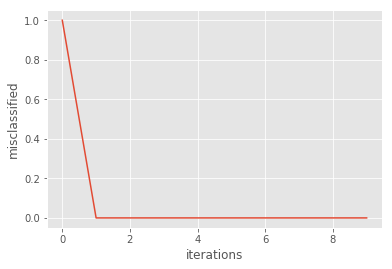

In [4]:
# set weights to zero
w = np.zeros(shape=(1, X.shape[1]+1)) # One extra weight for the bias term 

misclassified_samples_per_epoch = [] 

  
for epoch in range(num_iter):
    misclassified = 0
    for x, y_actual in zip(X, Y):
        
        # Insert '1' before 0th index for the bias term
        x = np.insert(x,0,1)
        
        # Calculate the predicted value 'target'
        y = np.dot(w, x.T)
        target = 1.0 if (y > 0) else 0.0
        
        # Calculate the error term 'delta'
        delta = (y_actual - target)

        if(delta > 0): # misclassified
            misclassified += 1
            
            # Update the weights
            w += (delta * x)

    misclassified_samples_per_epoch.append(misclassified)

print('The final updated weights are:\n\n',w)
print('\n')

epochs = np.arange(1, num_iter+1)
plt.plot(misclassified_samples_per_epoch)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

### Reference:
https://towardsdatascience.com/perceptron-and-its-implementation-in-python-f87d6c7aa428